# Continuous variable quantum teleportation

Teleportation of quadrature phase.

Braunstein, Samuel L., and H. Jeff Kimble. "Teleportation of continuous quantum variables." Physical Review Letters 80.4 (1998): 869.

In [2]:
import photonqat as pq
import numpy as np
import matplotlib.pyplot as plt

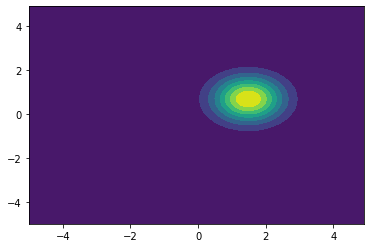

Mode 0: Original state = [1.4142135623730951, 0.7071067811865476]
measured x = 2.451879502946076
measured p = 0.0020150983201235872
teleported mu = [1.48807457 0.68177295]


In [6]:
G = pq.Gaussian(3)

# original state
x_origin = 1
p_origin = 0.5

# squeezeng level
r = 2

G.D(0, x_origin + p_origin * 1j) # state to teleport
G.S(1, -r)
G.S(2, r)
G.BS(1, 2, np.pi/4) # 50:50 beam splitter
G.BS(0, 1, np.pi/4) # 50:50 beam splitter
G.MeasX(0)
G.MeasP(1)
G.X(2, G.Creg(0, "x", scale = np.sqrt(2)))
G.Z(2, G.Creg(1, "p", scale = np.sqrt(2)))
#G.X(2, G.Creg(0, "x"))
#G.Z(2, G.Creg(1, "p"))

G.run()

G.Wigner(2) # plot
print('Mode 0: Original state =', [x_origin * np.sqrt(2), p_origin * np.sqrt(2)])
print('measured x =', G.Creg(0, "x").read())
print('measured p =', G.Creg(1, "p").read())
print('teleported mu =', G.mean(2)) # mu of qumode 0

Mode 0: Original state = [1.4142135623730951, 0.7071067811865476]
measured x = [2.94079753]
measured p = [-0.-1.69504302j]


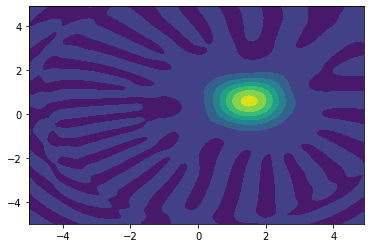

In [4]:
F = pq.Fock(3, cutoff = 25)

# original state
x_origin = 1
p_origin = 0.5

# squeezeng level
r = 2

# prepare the state to teleport
F.D(0, x_origin + p_origin * 1j) # Displacement

F.S(1, -r) # Squeezing
F.S(2, r) # Squeezing
F.BS(1, 2, np.pi/4) # 50:50 beam splitter
F.BS(0, 1, np.pi/4) # 50:50 beam splitter
F.MeasX(0)
F.MeasP(1)
F.D(2, F.Creg(0, "x", scale = 1))
F.D(2, F.Creg(1, "p", scale = 1j))
F.run()

print('Mode 0: Original state =', [x_origin * np.sqrt(2), p_origin * np.sqrt(2)])
print('measured x =', F.Creg(0, "x", scale = 1).read())
print('measured p =', F.Creg(1, "p", scale = 1j).read())

W, x, p = F.Wigner(2) # plot